# Exploring Dandiset 000563: Allen Institute OpenScope - Temporal Barcoding in Mouse Visual System

*An interactive guide for reanalysis and exploration*

---

**Note:** This notebook was generated with the assistance of AI. Please use caution interpreting code or results; always validate outputs and adapt scripts to your own research questions!

## Overview of the Dandiset

- **Dandiset DOI:** [https://dandiarchive.org/dandiset/000563/0.250311.2145](https://dandiarchive.org/dandiset/000563/0.250311.2145)
- **Title:** Allen Institute Openscope - Barcoding
- **Purpose:** Large-scale recordings of visual responses across mouse brain (cortical and subcortical) using Neuropixels probes and optogenetics, with a focus on temporal precision and potential “barcodes” in spike timing for neuron types.
- **Data Types:** Extracellular electrophysiology (LFP, spike times, unit tables), optogenetic stimulation data, behavioral (e.g. running), eye-tracking, and detailed stimulus presentation timing.

**For DANDI/NWB documentation:** [NWB Format](https://www.nwb.org/) | [DANDI Documentation](https://www.dandiarchive.org/handbook/00-about.html)

---

## What This Notebook Covers

1. Summary of the Dandiset structure and NWB file organization.
2. Programmatic listing and preview of file content.
3. Loading and visualization of electrophysiology (LFP), unit (spike), behavioral, and optogenetics data—streamed remotely.
4. Demonstrations of correct NWB access for units/spike times and event tables.
5. Visual and tabular summaries to enable next steps in your own analyses.

---

## Required Python Packages

The following packages are required:

- `dandi`
- `remfile`
- `h5py`
- `pynwb`
- `matplotlib`
- `numpy`
- `pandas`

(All are assumed to already be installed for this notebook.)

## Accessing Dandiset Assets Using the DANDI API

The DANDI API allows programmatic listing and streaming of data files. Below, we connect to the API, summarize available NWB files, and display example file structure/naming.

In [1]:
from dandi.dandiapi import DandiAPIClient
from itertools import islice
import humanize

# Open the Dandiset
dandiset_id = "000563"
dandiset_version = "0.250311.2145"
client = DandiAPIClient()
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# List all NWB files (show only first 20 here for brevity)
assets = list(dandiset.get_assets_by_glob("*.nwb"))
total_size = sum(asset.size for asset in assets)
example_files = [
    {'path': asset.path, 'size': humanize.naturalsize(asset.size)}
    for asset in assets[:20]
]

print(f"Total NWB files: {len(assets)}")
print(f"Estimated total NWB size: {humanize.naturalsize(total_size)}")
print("Example NWB files:")
for fileinfo in example_files:
    print(f"  {fileinfo['path']}  ({fileinfo['size']})")

Total NWB files: 94
Estimated total NWB size: 200.2 GB
Example NWB files:
  sub-699241/sub-699241_ses-1318772854_probe-1_ecephys.nwb  (2.1 GB)
  sub-699241/sub-699241_ses-1318772854_probe-3_ecephys.nwb  (2.1 GB)
  sub-699241/sub-699241_ses-1318772854_probe-4_ecephys.nwb  (1.9 GB)
  sub-699241/sub-699241_ses-1318772854_probe-0_ecephys.nwb  (2.1 GB)
  sub-699241/sub-699241_ses-1318772854_ogen.nwb  (2.8 GB)
  sub-699241/sub-699241_ses-1318772854_probe-2_ecephys.nwb  (1.9 GB)
  sub-699846/sub-699846_ses-1314466742_probe-1_ecephys.nwb  (2.0 GB)
  sub-699846/sub-699846_ses-1314466742_probe-2_ecephys.nwb  (2.0 GB)
  sub-699846/sub-699846_ses-1314466742_probe-4_ecephys.nwb  (2.1 GB)
  sub-699846/sub-699846_ses-1314466742_probe-3_ecephys.nwb  (2.0 GB)
  sub-699846/sub-699846_ses-1314466742_ogen.nwb  (3.0 GB)
  sub-699846/sub-699846_ses-1314466742_probe-5_ecephys.nwb  (1.8 GB)
  sub-699846/sub-699846_ses-1314466742_probe-0_ecephys.nwb  (2.1 GB)
  sub-698259/sub-698259_ses-1314229564_probe-2_ecep

### File Organization
- Files are organized as `sub-<subject>/sub-<subject>_ses-<session>_<type>.nwb`
- `<type>` may be `probe-<n>_ecephys`, `ogen`, etc.
- Each session often includes multiple probes and associated behavioral/optogenetics data.

NWB files can be *explored interactively* (without download) at [Neurosift](https://neurosift.app/).

## Choosing Example NWB Files for Exploration

We'll use the following files as examples:
- `sub-699241/sub-699241_ses-1318772854_probe-1_ecephys.nwb` (an electrophysiology file focusing on one probe)
- `sub-699241/sub-699241_ses-1318772854_ogen.nwb` (an optogenetics, stimulus, and behavioral data file for the same session)

The streaming approach demonstrated below allows access to large datasets without bulk download.

## Loading and Summarizing an Electrophysiology (Probe) NWB File

We'll stream `probe-1_ecephys.nwb`, summarize its main content—including subject metadata, LFP shape, electrodes, and session information.

In [2]:
import h5py
import remfile
import pynwb

# Set up NWB file streaming
probe_path = "sub-699241/sub-699241_ses-1318772854_probe-1_ecephys.nwb"
probe_asset = next(dandiset.get_assets_by_glob(probe_path))
remote_file = remfile.File(probe_asset.download_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Summarize subject/session
subject = {
    'subject_id': getattr(nwb.subject, 'subject_id', None),
    'species': getattr(nwb.subject, 'species', None),
    'sex': getattr(nwb.subject, 'sex', None),
    'age': getattr(nwb.subject, 'age', None),
    'genotype': getattr(nwb.subject, 'genotype', None),
    'strain': getattr(nwb.subject, 'strain', None)
}
print("Subject/Session Info:")
print(subject)
print("  session_description:", nwb.session_description)
print("  session_start_time:", nwb.session_start_time)
print("  session_id:", getattr(nwb, 'session_id', None))

# Summarize LFP data shape/type
lfp_name = [k for k in nwb.acquisition if 'lfp' in k][0]
lfp = nwb.acquisition[lfp_name]
lfp_es_key = list(lfp.electrical_series.keys())[0]
lfp_es = lfp.electrical_series[lfp_es_key]
print("LFP dataset:", lfp_es_key)
print("  shape:", lfp_es.data.shape)
print("  dtype:", lfp_es.data.dtype)
print("  unit:", lfp_es.unit)

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Subject/Session Info:
{'subject_id': '699241', 'species': 'Mus musculus', 'sex': 'M', 'age': 'P124D', 'genotype': 'Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt', 'strain': 'Transgenic'}
  session_description: LFP data and associated info for one probe
  session_start_time: 2023-12-19 00:00:00-08:00
  session_id: 1318772854
LFP dataset: probe_1_lfp_data
  shape: (10178133, 96)
  dtype: float32
  unit: volts


## Visualizing LFP Data: Example Traces from Multiple Channels

Let's visualize a two-second segment from the first five LFP channels to get a sense of signal quality and structure.

(Data plotted in millivolts, with vertical offsets for clarity.)

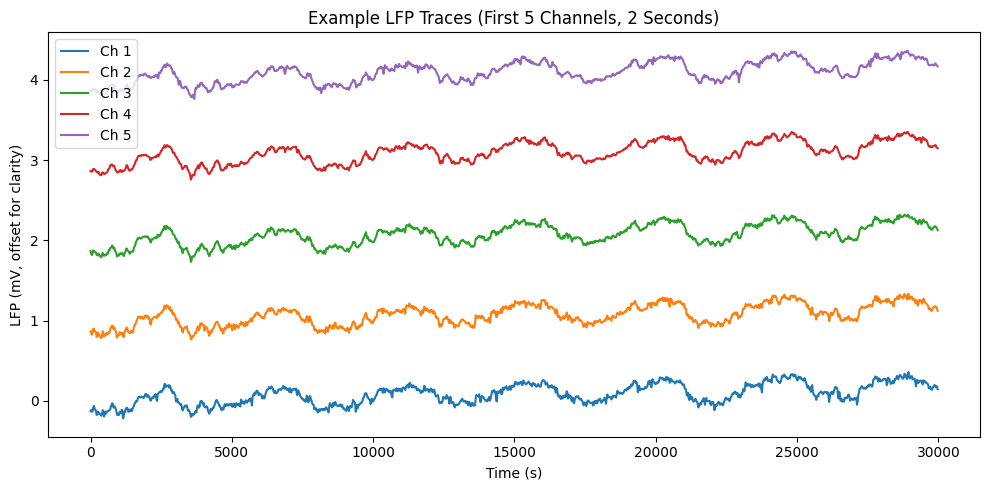

In [3]:
import matplotlib.pyplot as plt

# Sample 2 seconds at estimated 625 Hz (see metadata in file)
fs = 625  # Hz
segment_len = fs * 2
lfp_times = lfp_es.timestamps[:segment_len]
lfp_data = lfp_es.data[:segment_len, :5]  # first 5 channels

plt.figure(figsize=(10, 5))
offset = 0
for i in range(5):
    plt.plot(lfp_times, lfp_data[:,i] * 1e3 + offset, label=f'Ch {i+1}')
    offset += 1.0
plt.xlabel('Time (s)')
plt.ylabel('LFP (mV, offset for clarity)')
plt.title('Example LFP Traces (First 5 Channels, 2 Seconds)')
plt.legend()
plt.tight_layout()
plt.show()

## Electrode Location Summary

Next, we'll summarize which anatomical locations are covered by each probe channel.

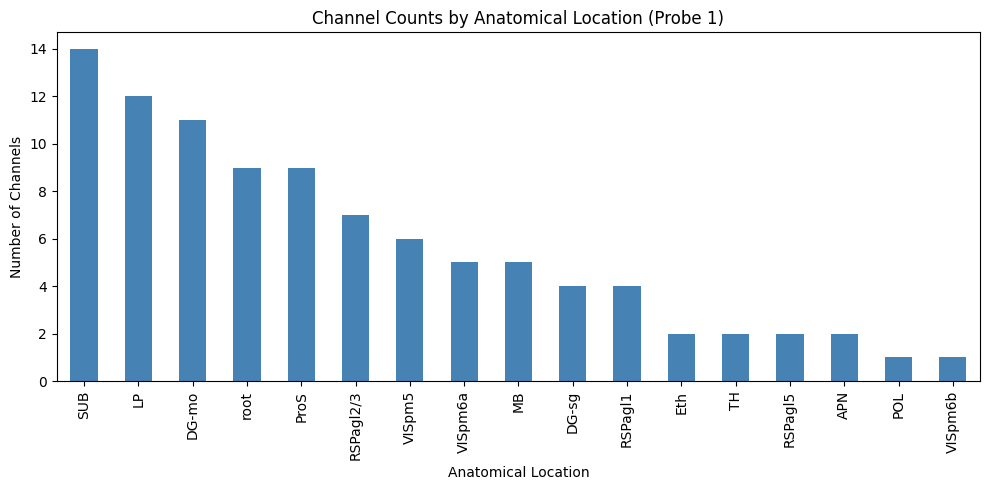

In [4]:
electrodes_df = lfp_es.electrodes.table.to_dataframe()
location_counts = electrodes_df['location'].value_counts()
plt.figure(figsize=(10, 5))
location_counts.plot(kind='bar', color='steelblue')
plt.xlabel('Anatomical Location')
plt.ylabel('Number of Channels')
plt.title('Channel Counts by Anatomical Location (Probe 1)')
plt.tight_layout()
plt.show()

### What regions are recorded?
> High coverage of SUB (subiculum), LP (lateral posterior nucleus), DG-mo (dentate gyrus, molecular layer), and more—useful for region-specific analyses or comparisons.

## Loading and Summarizing the Ogen (Optogenetic/Behavior/Stimulus) NWB File

Now let's inspect `sub-699241/sub-699241_ses-1318772854_ogen.nwb`, which contains spike data, behavior, optogenetics, and visual stimuli tables.

In [5]:
# Re-load as new file (streamed)
ogen_path = "sub-699241/sub-699241_ses-1318772854_ogen.nwb"
ogen_asset = next(dandiset.get_assets_by_glob(ogen_path))
remote_file = remfile.File(ogen_asset.download_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb_ogen = io.read()

print("Ogen file session description:", nwb_ogen.session_description)
print("Subject:", getattr(nwb_ogen.subject, 'subject_id', None))
print("Available processing modules:", list(nwb_ogen.processing.keys()))
print("Intervals tables:", list(nwb_ogen.intervals.keys()))
print("Units table shape:", len(nwb_ogen.units.id))

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Ogen file session description: Data and metadata for an Ecephys session
Subject: 699241
Available processing modules: ['optotagging', 'running', 'stimulus']
Intervals tables: ['RepeatFFF_presentations', 'UniqueFFF_presentations', 'invalid_times', 'receptive_field_block_presentations', 'static_block_presentations']
Units table shape: 2299


## Visualization: Optogenetic Stimulation Events Timing

We'll plot the timing and duration of the first 20 optogenetic stimulation epochs from this session.

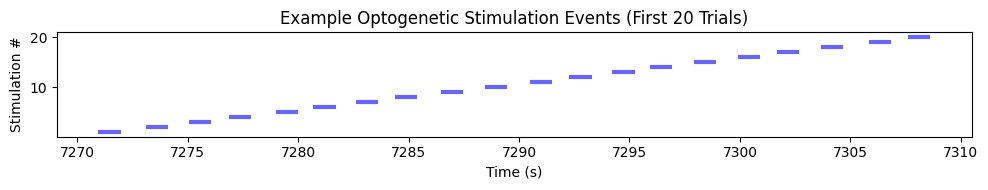

In [6]:
import pandas as pd

optotagging = nwb_ogen.processing['optotagging']
optogenetic_stimulation = optotagging.data_interfaces['optogenetic_stimulation']
stim_df = optogenetic_stimulation.to_dataframe().head(20)  # first 20 stim epochs

plt.figure(figsize=(10,2))
for i, (s, e) in enumerate(zip(stim_df['start_time'], stim_df['stop_time'])):
    plt.hlines(i+1, s, e, color='blue', linewidth=3, alpha=0.6)
plt.xlabel('Time (s)')
plt.ylabel('Stimulation #')
plt.title('Example Optogenetic Stimulation Events (First 20 Trials)')
plt.tight_layout()
plt.show()

## Example Behavioral Trace: Running Speed

Let's visualize the first ~100 seconds of running speed, an important behavioral covariate.

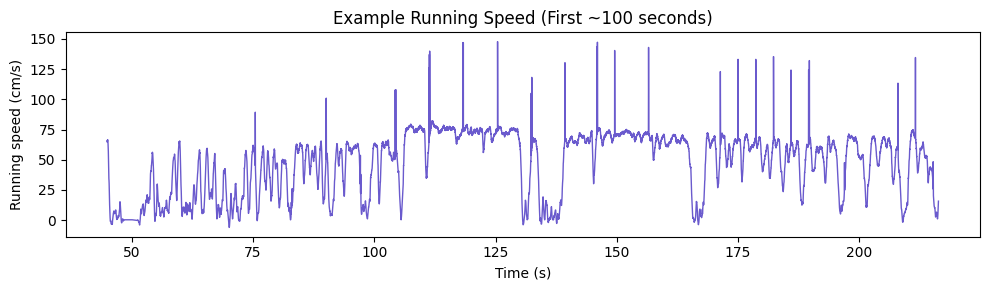

In [7]:
data = nwb_ogen.processing['running'].data_interfaces['running_speed']
timestamps = data.timestamps[:10000]
values = data.data[:10000]

plt.figure(figsize=(10, 3))
plt.plot(timestamps, values, color='slateblue', linewidth=1)
plt.xlabel('Time (s)')
plt.ylabel('Running speed (cm/s)')
plt.title('Example Running Speed (First ~100 seconds)')
plt.tight_layout()
plt.show()

## Example Physiological Behavior: Pupil Area from Eye Tracking

Here, we view the (raw and processed) pupil area signals over the first ~100 seconds.

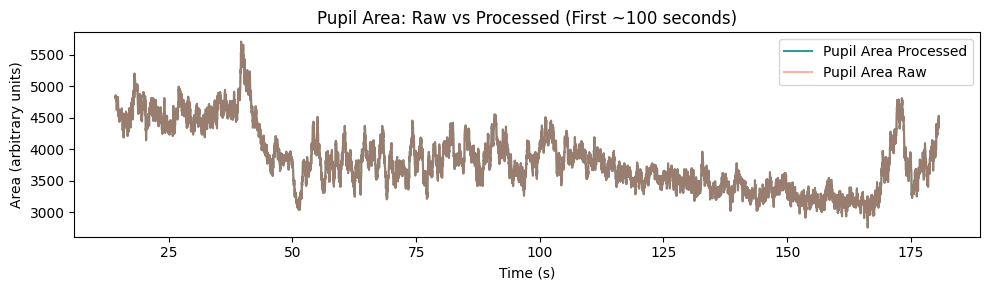

In [8]:
pupil = nwb_ogen.acquisition['EyeTracking'].spatial_series['pupil_tracking']
area = pupil.area[:10000]
area_raw = pupil.area_raw[:10000]
timestamps = pupil.timestamps[:10000]

plt.figure(figsize=(10,3))
plt.plot(timestamps, area, label='Pupil Area Processed', color='teal', alpha=0.8)
plt.plot(timestamps, area_raw, label='Pupil Area Raw', color='tomato', alpha=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Area (arbitrary units)')
plt.title('Pupil Area: Raw vs Processed (First ~100 seconds)')
plt.legend()
plt.tight_layout()
plt.show()

## Accessing and Visualizing Unit (Spike) Data

The correct way to load spike times for a given unit is via `nwb.units.spike_times_index[i]` (a full vector for the i-th unit). Here, we plot a raster of the first 10 units over an active window (20-22 seconds).

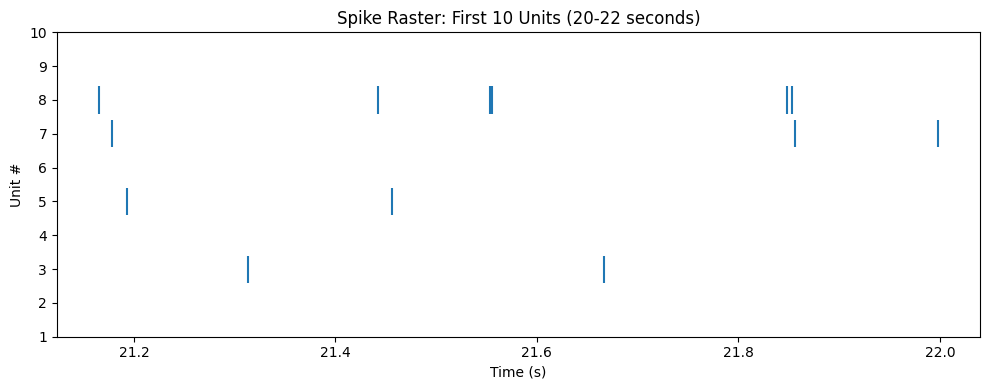

In [9]:
units = nwb_ogen.units
num_units = min(10, len(units.id))
window_start = 20
window_end = 22
fig, ax = plt.subplots(figsize=(10, 4))
for unit_idx in range(num_units):
    unit_spike_times = units.spike_times_index[unit_idx]
    spikes_in_window = unit_spike_times[(unit_spike_times >= window_start) & (unit_spike_times < window_end)]
    ax.vlines(spikes_in_window, unit_idx + 1 - 0.4, unit_idx + 1 + 0.4)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Unit #')
ax.set_title(f'Spike Raster: First 10 Units ({window_start}-{window_end} seconds)')
ax.set_yticks(range(1, num_units + 1))
plt.tight_layout()
plt.show()

---
## Next Steps and Reanalysis Suggestions

- Use code patterns above for other NWB files and any segment/unit of interest.
- Adapt time windows, schematic event alignment, or region-based filtering for your research question.
- Browse Dandiset and NWB metadata further at [DANDI Archive](https://dandiarchive.org/dandiset/000563/0.250311.2145) or [Neurosift](https://neurosift.app/).

---

**You are now ready to extract, visualize, and analyze the multimodal data streams (spike times, LFP, behavior, optogenetics, and stimulus) in Dandiset 000563 with confidence!**

*For additional information or support, consult the Allen Institute OpenScope team, the DANDI documentation, or the NWB user guide.*